In [64]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train=pd.read_csv("../data/raw/train.csv", index_col="Id")
print(train.shape)

(1460, 80)


In [66]:
test=pd.read_csv("../data/raw/test.csv", index_col="Id")
print(test.shape)

(1459, 79)


In [67]:
test["SalePrice"] = 0
test.shape

(1459, 80)

In [68]:
train_test = pd.concat((train, test)).reset_index(drop=True)
train_test.shape

(2919, 80)

In [69]:
train_test = pd.concat([train, test], axis=0, sort=False)
train_test.shape

(2919, 80)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28ea7ef0>,
      dtype=object)

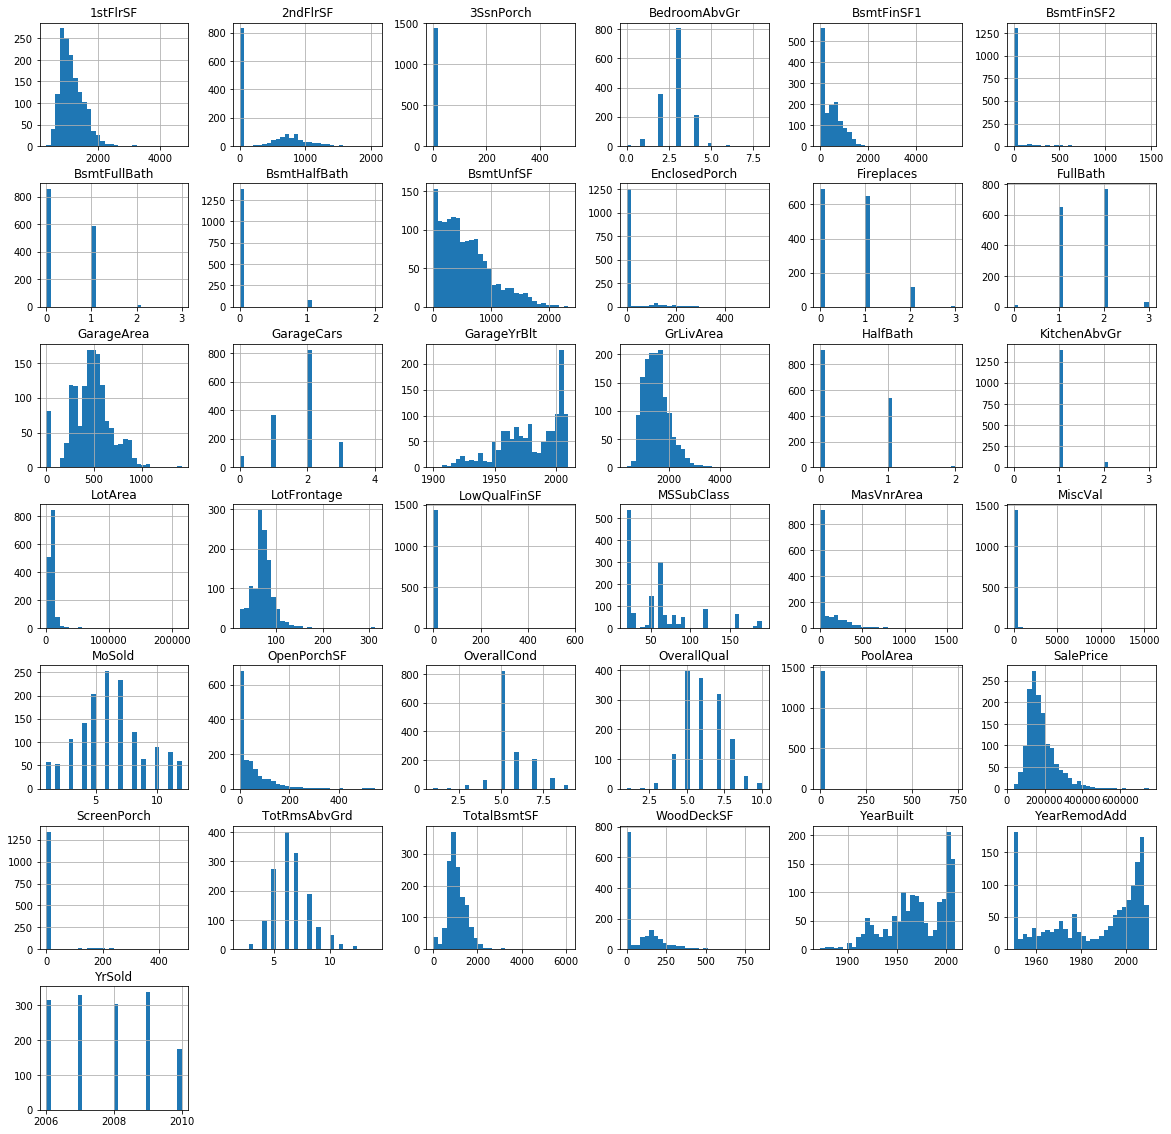

In [70]:
train.hist(bins = 30, figsize = (20,20))

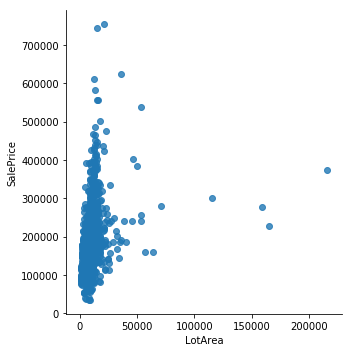

In [71]:
sns.lmplot(data=train, x="LotArea", y="SalePrice",  fit_reg=False)

### Missing values in train/test data

In [72]:
#train
na_list = list(train.columns[train.isnull().any()])
len(na_list)

19

In [73]:
#test
na_list = list(test.columns[test.isnull().any()])
len(na_list)

33

In [74]:
#train_test
len(train_test.columns[train_test.isnull().any()])

34

### Cleanning First 20 

In [75]:
df1 = train_test.iloc[:,0:20]

In [76]:
coln = list(train_test.columns)

#missing value counter

In [77]:
#missing value counter
def na_counter(data):
    coln = list(data.columns)
    df_na ={}
    for col in coln:
        if data[col].isnull().any()==True:
            mvalue = data[col].isnull().sum()
            mpercent = data[col].isnull().sum()/len(data)
            df_na[col]=[mvalue, mpercent]
    df_Na =pd.DataFrame(df_na).T
    df_Na.columns = ['NA',"PERCENT"]
    return df_Na

In [78]:
na_counter(df)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [ ]:
# Alley is not important, removed
# Further analysis wit hMSZonning Lot Frontage and Utilities

## Feature Engineering
Quantitative, cateogrical data
Dummy variables.

### Nominal columns

In [ ]:
continuous_col = df1.describe().columns
categorical_col =df1.drop(continuous_col, axis=1).columns

In [ ]:
def value_counts(data): 
    continuous_col = data.describe().columns
    categorical_col =data.drop(continuous_col, axis=1).columns
    for col in (categorical_col):
            print(data[col].value_counts())
            print(" ")

In [ ]:
value_counts(df1)

In [ ]:
train["MSZoning"].value_counts()

In [ ]:
test.loc[test["MSZoning"].isnull(),'Neighborhood']

In [ ]:
test.loc[test['Neighborhood']=="IDOTRR", "MSZoning"].value_counts()

In [ ]:
df1["MSZoning"] = df1["MSZoning"].fillna("RM")

In [ ]:
sum(df1.MSZoning.isnull())

In [ ]:
# removed Utility, Street, condition 2
#drop columns 
df1 = df1.drop(['Street', 'Alley',"Utilities","Condition2"], axis=1)

In [ ]:
sum(test["LotFrontage"].isnull())

In [ ]:
#train_test["LotFrontage_fillin"] = train_test["LotFrontage"] if we want to create new column

In [ ]:
df1.loc[df1["LotFrontage"].isnull(), "LotFrontage"] = 0

In [ ]:
len(df1[df1["LotFrontage"].isnull()])

In [ ]:
len(df1.columns[df1.isnull().any()])

## 21 - 40 cols
### Data cleaning

In [79]:
df_subset=train_test.iloc[:,20:40]

In [80]:
df_subset["MasVnrType"].fillna("None", inplace = True) 
df_subset["MasVnrArea"].fillna(0.0, inplace = True) 
df_subset["BsmtQual"].fillna("NoBsmt",inplace=True)
df_subset["BsmtCond"].fillna("NoBsmt",inplace=True)
df_subset["BsmtExposure"].fillna("NoBsmt",inplace=True)
df_subset["BsmtFinType1"].fillna("NoBsmt",inplace=True)
df_subset["BsmtFinType2"].fillna("NoBsmt",inplace=True)
df_subset['Exterior1st'].fillna("None", inplace = True) 
df_subset['Exterior2nd'].fillna("None", inplace = True)
df_subset['BsmtFinSF1'].fillna(0, inplace = True) 
df_subset['BsmtFinSF2'].fillna(0, inplace = True) 
df_subset['BsmtUnfSF'].fillna(0, inplace = True) 
df_subset['TotalBsmtSF'].fillna(0, inplace = True) 

del df_subset['RoofMatl']

In [81]:
df2= df_subset

In [82]:
list(df2.columns[df2.isnull().any()])

[]

### 40 :63

In [83]:
df3 = train_test.iloc[:,40:63]

df3.columns

Index(['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual'],
      dtype='object')

In [84]:
def impute_fields(df):
    
    df.Electrical = df.Electrical.fillna("SBrkr")

    """ Impute with equavelant of overall house quality : Average, equivalent "TA" """
    df.KitchenQual = df.KitchenQual.fillna("None")

    df.FireplaceQu = df.FireplaceQu.fillna("None")
    
    """ First change Garage Type for row with Null area and then change Garage Area """
    df.loc[df.GarageArea.isnull(), "GarageType"] = np.nan
    df.loc[df.GarageArea.isnull(), "GarageArea"] = 0
    
        

    """ For one record with Garage Area 360 and with missing Garage values, set to average values based on Overall Quality """
    df.loc[(df.GarageArea==360) & df.GarageFinish.isnull(), "GarageFinish"] = "Unf"

    
    """ Set rest of the missing Garage valies to None """
    df.GarageFinish = df.GarageFinish.fillna("None")
    df.GarageType = df.GarageType.fillna("None")

    df.GarageCars = df.GarageCars.fillna(0)


    """ Impiute with Typ as mentioned in documentation. There does not seem to be clear relation with
        Overall quality fields
    """
    df.loc[df.Functional.isnull(), "Functional"] = "Typ"


    """Basement Fullbath and Halfbath NA values are related to  houses without basements. Soe set them to 0 """
    df.BsmtFullBath = df.BsmtFullBath.fillna(0)
    df.BsmtHalfBath = df.BsmtHalfBath.fillna(0)
    
    return df

In [85]:
df3= impute_fields(df3)

In [86]:
df3 = df3.drop(["LowQualFinSF","GarageYrBlt",'GarageQual'], axis=1)

In [87]:
list(df3.columns[df3.isnull().any()])

[]

### 63:80 

In [88]:
df4 = train_test.iloc[:,62:80]

In [89]:
df4 = df4.drop(["PoolQC","Fence","MiscFeature"] ,axis= 1)
df4 = df4.drop(["GarageCond","MiscVal"] ,axis= 1)

In [90]:
df4.loc[df4["SaleType"].isnull(), "SaleType"] = "Oth"
df4.loc[df4["GarageQual"].isnull(), "GarageQual"] = "NA"

In [91]:
sum(df4["GarageQual"].isnull() )

0

### combine all subdatasets

In [92]:
df = pd.concat([df1,df2,df3,df4], axis=1, sort=False)

In [93]:
len(df.columns[df.isnull().any()])

4

In [94]:
df.shape

(2919, 72)

In [95]:
df.to_csv("../data/processed/train_test.csv", index=False)

# Dummy variables

In [96]:
dummies = df1[['MSSubClass', 'MSZoning','LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']]

In [97]:
dummies = df1.copy()
for feature in list(dummies.columns):
    new_dummy = pd.get_dummies(dummies[feature], prefix=feature ,drop_first =True)  
# for feature in list(dummies.columns):
#     new_dummy = pd.get_dummies(dummies[feature], prefix=feature , drop_first =True)
#     dummies = pd.concat([dummies.drop(feature, axis=1), new_dummy], axis=1) 

In [98]:
def make_dummies(df1):

     #Encode the Categorical Data
    # Encode the Feature Variables (don't need to code the target)
    category_cols = ['MSSubClass', 'MSZoning','LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']

    return pd.get_dummies(df1, columns=category_cols, drop_first=True)
df1 = make_dummies(df1)

In [99]:
def make_dummies(df2):

     #Encode the Categorical Data
    # Encode the Feature Variables (don't need to code the target)
    category_cols = ["RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual",
                     "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                     "BsmtFinType2","Heating","HeatingQC"]
               

    return pd.get_dummies(df2, columns=category_cols, drop_first=True)
df2 = make_dummies(df2)

In [101]:
def make_dummies(df3):

     #Encode the Categorical Data
    # Encode the Feature Variables (don't need to code the target)
    category_cols = [
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']
               

    return pd.get_dummies(df3, columns=category_cols, drop_first=True)
df3 = make_dummies(df3)

In [102]:
def make_dummies(df4):
     #Encode the Categorical Data
    # Encode the Feature Variables (don't need to code the target)
    category_cols = ['GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']
               

    return pd.get_dummies(df4, columns=category_cols, drop_first=True)
df4 = make_dummies(df4)

In [103]:
df_dummies = pd.concat([df1,df2,df3,df4], axis=1, sort=False)

In [104]:
df_dummies.head()

,LotFrontage,LotArea,Street,Alley,Utilities,Condition2,YearBuilt,YearRemodAdd,MSSubClass_30,MSSubClass_40,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,Pave,NaN,AllPub,Norm,2003,2003,0,0,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,Pave,NaN,AllPub,Norm,1976,1976,0,0,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,Pave,NaN,AllPub,Norm,2001,2002,0,0,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,Pave,NaN,AllPub,Norm,1915,1970,0,0,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,Pave,NaN,AllPub,Norm,2000,2000,0,0,...,0,0,0,0,1,0,0,0,1,0


In [105]:
df_dummies.to_csv("../data/processed/test_train_dummies.csv")

In [57]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [25]:
X = train20[['LotShape', 'MSZoning', 'MSSubClass',"Neighborhood","Condition1","OverallQual","HouseStyle"]]  # input varialbe
Y = train20['SalePrice']  # output variable
ols.fit(X, Y)

ValueError: could not convert string to float: 'Reg'

### Chi sq test

In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [67]:
df = train
df['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])

#Initialize ChiSquare Class
cT = ChiSquare(df)

In [7]:
testColumns = train.columns

In [129]:
#Feature Selection
testColumns = ['MSSubClass',  'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

# testColumns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
#        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
#        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd' ]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="GarageQual" )  

MSSubClass is IMPORTANT for Prediction
LotFrontage is NOT an important predictor. (Discard LotFrontage from model)
LotArea is NOT an important predictor. (Discard LotArea from model)
Street is NOT an important predictor. (Discard Street from model)
Alley is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is NOT an important predictor. (Discard LotConfig from model)
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is IMPORTANT for Prediction
BldgType is IMPORTANT for Prediction
HouseStyle is IMPORTANT for Prediction
OverallQual is IMPORTANT for Prediction
OverallCond is IMPORTANT for Prediction
YearBuilt is IMPORTANT for Prediction
YearRemodAdd is IMPORTANT for Prediction

In [ ]:
testColumns = ['MSSubClass',  'Street',
       'Alley', 'LandContour', 'Utilities', 'Condition2', 
       'HouseStyle','YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2',
       'Electrical',  
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr','Functional',  'GarageType',
       'GarageYrBlt',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']

In [ ]:
## based on X test, selected what it said important


train_test_01 = train_test.drop(['MSSubClass',  'Street',
       'Alley', 'LandContour', 'Utilities', 'Condition2', 
       'HouseStyle','YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2',
       'Electrical',  
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr','Functional',  'GarageType',
       'GarageYrBlt',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold'], axis=1)

### Multicollinearity

In [72]:
from sklearn.linear_model import LinearRegression 
continuous_features = ['LotArea', 'YearBuilt', 'YearRemodAdd']
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
    df2     = train20.copy()
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature)

KeyError: ('LotArea', 'YearBuilt', 'YearRemodAdd')

#### Prediction

In [ ]:
predictions = model.predict(X_test)

#### Submission

In [ ]:
submission = pd.read_csv("data/sample_submission.csv", index_col="Id")
print(submission.shape)
submission.head()

In [ ]:
submission["SalePrice"] = predictions
print(submission.shape)

submission.head()

In [ ]:
submission.to_csv("data/submission.csv")